# 기본 설정

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import load_iris
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [52]:
iris = load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [51]:
df = pd.DataFrame(x, columns=feature_names)
df["species"] = [str(iris.target_names[i]) for i in y]

In [53]:
feature_names_kr = ["꽃받침 길이", "꽃받침 너비", "꽃잎 길이", "곷잎 너비"]
target_names_kr = ["세토사", "버시컬러", "버지니카"]

In [ ]:
colors = ["#FF6B6B", "#4ECDC4", "#45B7D1"]
species_colors = {target_names[i]: color[i] for i in range(3)}

## 특성 간 관계 분석

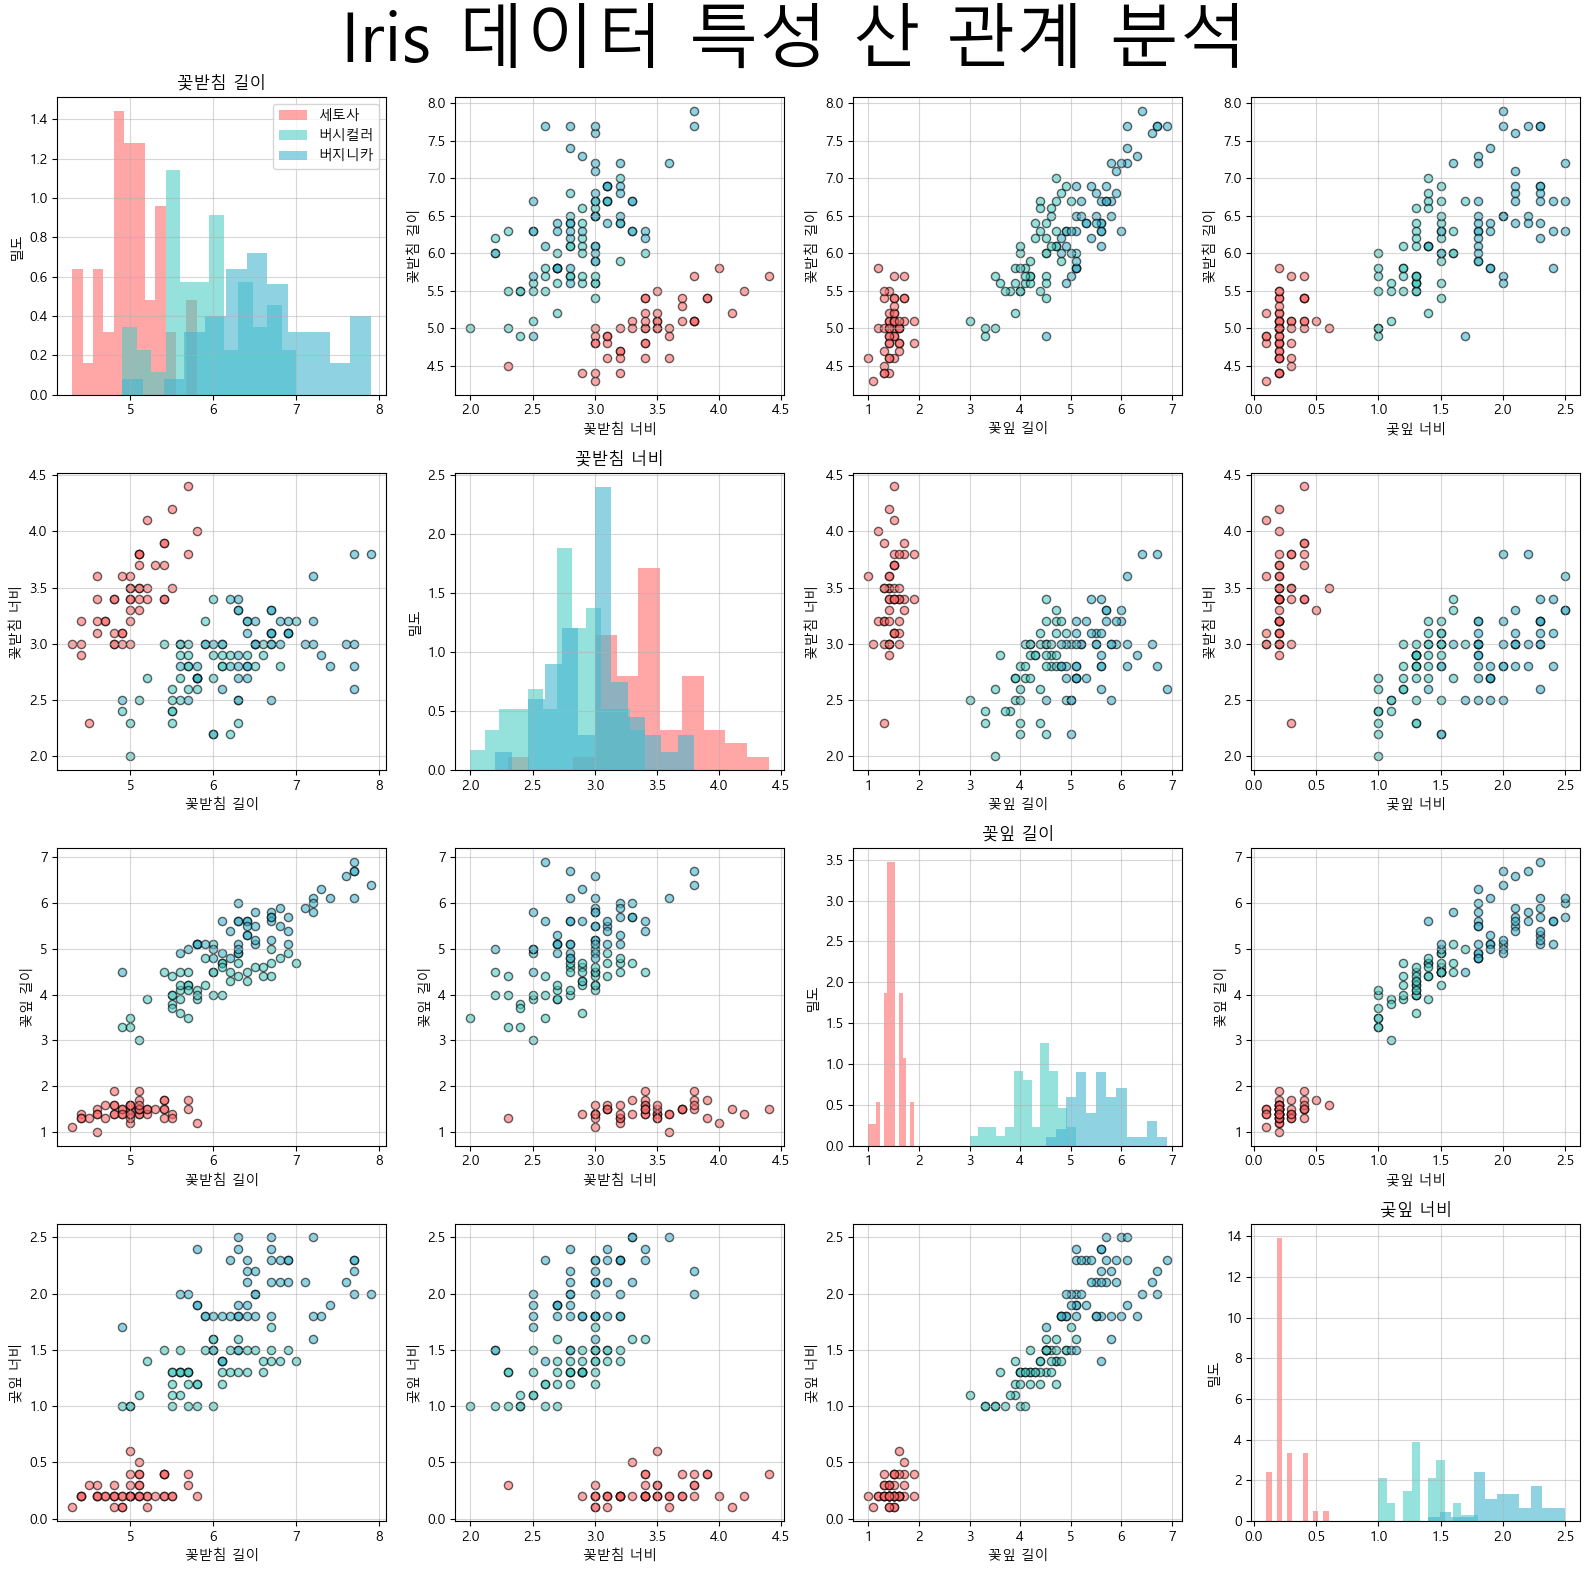

In [97]:
fig, axes = plt.subplots(4, 4, figsize=(16,16) )
fig.suptitle("Iris 데이터 특성 산 관계 분석", fontsize=50)

for i in range(4):
    for j in range(4):
        ax = axes[i,j]
        if i == j:
            # 도수 분포를 위한 데이터 정리
            for k,species in enumerate(target_names):
                data = df[df['species'] == species].iloc[:, i]
                ax.hist(data,
                        bins=12,
                        density=True,
                        color=color[k],
                        alpha=0.6,
                        label=target_names_kr[k])
            ax.set_title(feature_names_kr[i])
            ax.set_ylabel("밀도")
            if i == 0:
                ax.legend()
        else:
            # 산점도 그릴 곳.
            for k,species in enumerate(target_names):
                data = df[df["species"] == species]
                x = data.iloc[:, j]
                y = data.iloc[:, i]
                ax.scatter(x,y, 
                           color = color[k],
                           alpha=0.6,
                           s=35,
                           edgecolors='black')
            ax.set_xlabel(feature_names_kr[j])
            ax.set_ylabel(feature_names_kr[i])
        ax.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

(array([ 1.,  5., 12.,  4.,  9.,  8.,  5.,  2.,  1.,  3.]),
 array([4.5 , 4.74, 4.98, 5.22, 5.46, 5.7 , 5.94, 6.18, 6.42, 6.66, 6.9 ]),
 <BarContainer object of 10 artists>)

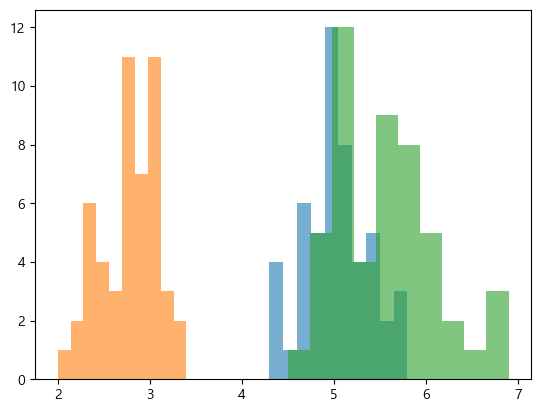

In [77]:
data0 = df[df['species'] == target_names[0]].iloc[:, 0]
data1 = df[df['species'] == target_names[1]].iloc[:, 1]
data2 = df[df['species'] == target_names[2]].iloc[:, 2]

plt.hist(data0, alpha=0.6)
plt.hist(data1, alpha=0.6)
plt.hist(data2, alpha=0.6)

# sctter는 어디에 쓰는가?
- 연말 때 각 부서별 매출 구할 때
    - 동그라미 크기로 비교. -> 정해진 양이 확정되어 있을 때 각각이 차지하고 있는 비율을 나타낼 때
    - HitMap도 자주 같이 사용

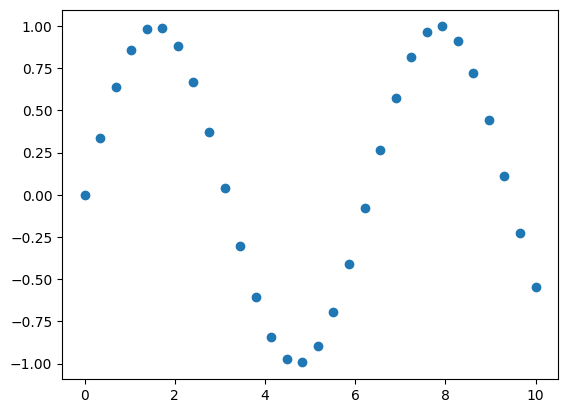

In [5]:
x  =np.linspace(0, 10, 30)
y = np.sin(x)
plt.scatter(x, y, marker='o')

- 지금처럼 데이터의 상관관계가 없을 때는 색깔도 끊어지도록 사용
- 연결된 데이터는 비슷한 계열의 색깔로 표시

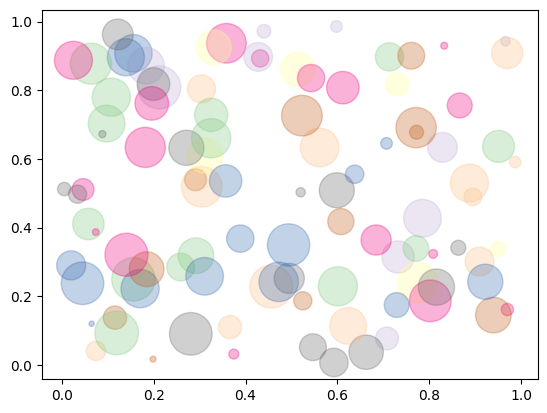

In [20]:
rng = np.random.RandomState(42)
x = rng.rand(100)
y = rng.rand(100)
color = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=color, s=sizes, alpha=0.3, cmap='Accent');

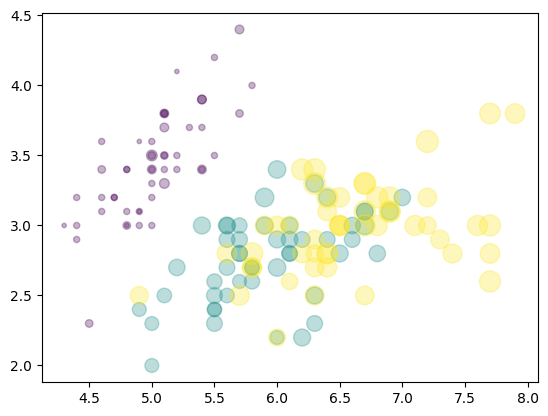

In [38]:
# sklearn에서 제공
iris = load_iris() # sklearn에서 가져온 것이기 때문에 dictionary로 가져옴 -> Key가 중요함
iris.data # 종속변인 ->  colum -> vector -> Series 부르는 명칭들
feat = iris.data.T
feat

plt.scatter(feat[0], feat[1], c=iris.target, s=100*feat[3], alpha=0.3)

In [44]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# Histogram

<h3 style="margin-bottom: 0.2em;">왜 데이터를 분석할 때 가장 효과적일까?</h3>
<ul style="margin-top: 0.2em;">
  <li>도메인 지식이 없을 때, 우선 <strong>히스토그램</strong>으로 줄 세워서 값이 많은 것부터 분석하기</li>
</ul>

In [47]:
data = np.random.randn(1000)

(array([  2.,  10.,  47., 109., 215., 263., 189., 107.,  45.,  13.]),
 array([-3.45006132, -2.8200193 , -2.18997729, -1.55993528, -0.92989326,
        -0.29985125,  0.33019076,  0.96023278,  1.59027479,  2.2203168 ,
         2.85035882]),
 <BarContainer object of 10 artists>)

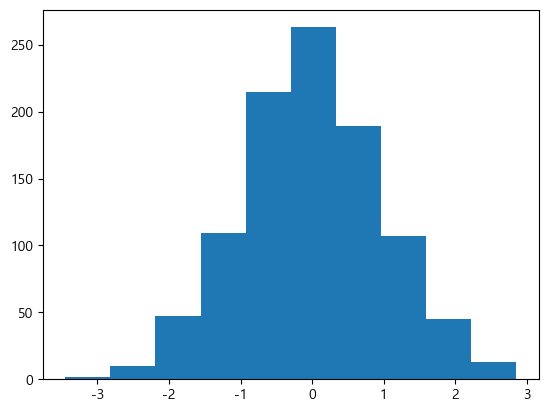

In [50]:
plt.hist(data)

### PairPlot